In [1]:
import os
cwd = os.getcwd()
os.chdir(os.path.join(cwd,'../../data/exactvsheur'))

In [2]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as matcoll
import glob
import json

In [3]:
def file_finder(deg):
    deg = str(deg)+'-deg'
    rides = glob.glob('*.csv', recursive=True)
    rides  = [s for s in rides if deg in s]
    return rides

In [25]:
def plot_algo(df,figsize = (15,10)):    
    y01   = df['exact-distances'].values
    y02   = df['exact-predecessors'].values
    y11   = df['heuristic-distances'].dropna().values
    y12   = df['heuristic-predecessors'].dropna().values
    x0    = range(len(y01))
    x1    = range(len(y11))
    idx   = np.argwhere(np.diff(np.sign(y11 - y12))).flatten()


    lines = []
    for i,dx in enumerate(idx):
        pair = ((dx,0),(dx,y12[i]))
        lines.append(pair)
    max_heur = np.where(y11==y11[-1])[0][-1]
    lines.append(((max_heur,0),(max_heur,max(y11))))
    linecoll = matcoll.LineCollection(lines, colors ='k', linestyle = '--',alpha=0.3)
    fig, ax = plt.subplots(figsize=figsize)
    ax.add_collection(linecoll)

    plt.scatter(x0, y01, s = 0.8, c = 'b', alpha = 0.2,marker = 'o' ,label = 'exact')
    plt.scatter(x1, y11, s = 0.8, c = 'g', alpha = 0.5,marker = 'o' ,label = 'heuristic')

    #plt.plot(x0, y02, c ='r', label = '')
    #plt.plot(x1, y12, c ='r', label = '')

    lgnd = plt.legend(scatterpoints=1, fontsize=10)
    lgnd.legendHandles[0]._sizes = [30]
    lgnd.legendHandles[1]._sizes = [30]

    plt.ylabel('Distance')
    plt.xlabel('Iterations')
    #plt.xticks(range(0,max(x0),10000))
    plt.ylim(min(y02)-200,max(y01))
    plt.xlim(0,max(x0))
    plt.show()

# Two Degree ride

In [9]:
df_2 = pd.read_csv(file_finder(2)[0], delimiter = ';', header=0, index_col=0)

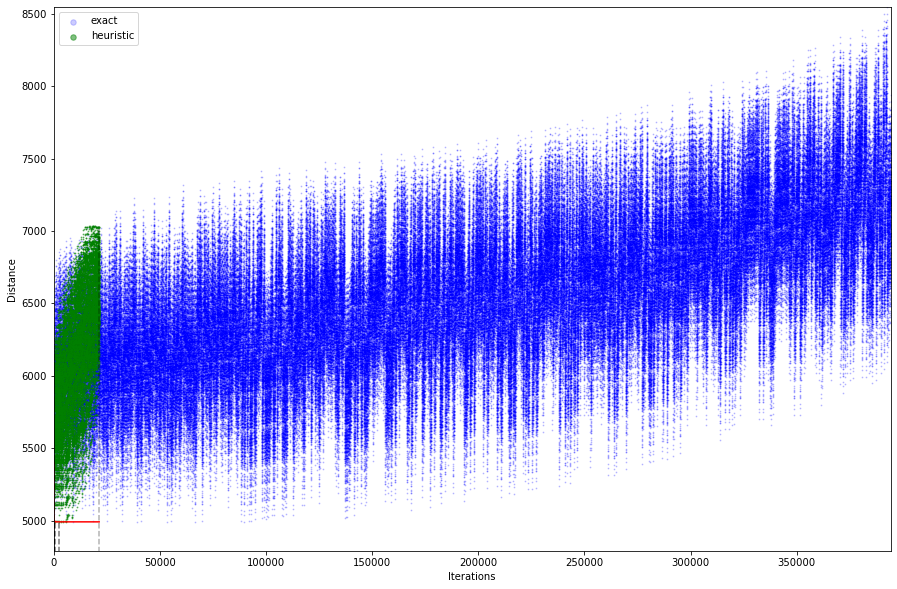

In [10]:
plot_algo(df_2)

# Three Degree Ride

In [29]:
df_3 = pd.read_csv(file_finder(3)[1], delimiter = ';', header=0, index_col=0)

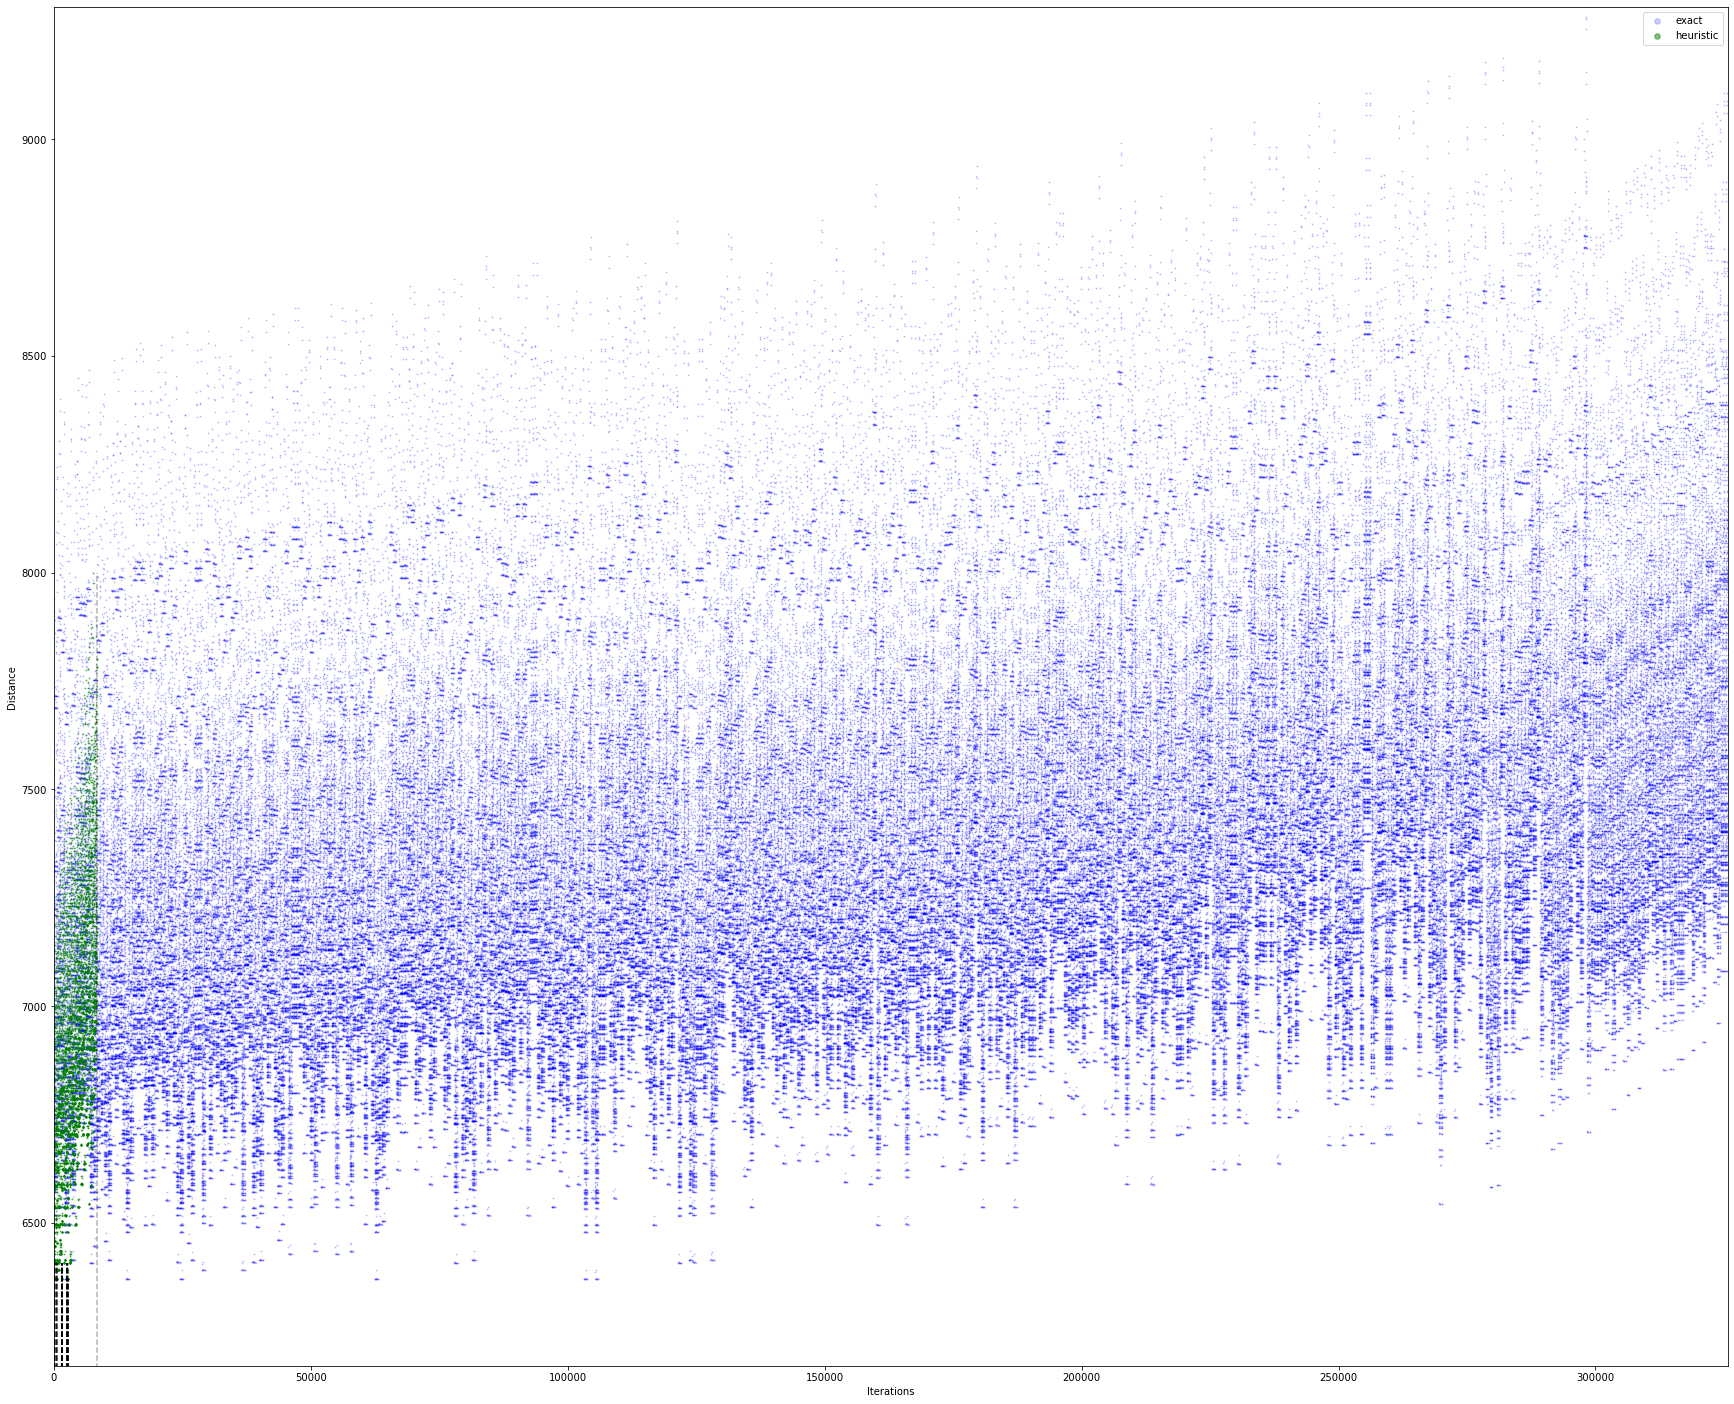

In [30]:
plot_algo(df_3, figsize = (30,25))

# Four Degree Ride

In [13]:
df_4 = pd.read_csv(file_finder(4)[0], delimiter = ';', header=0, index_col=0)

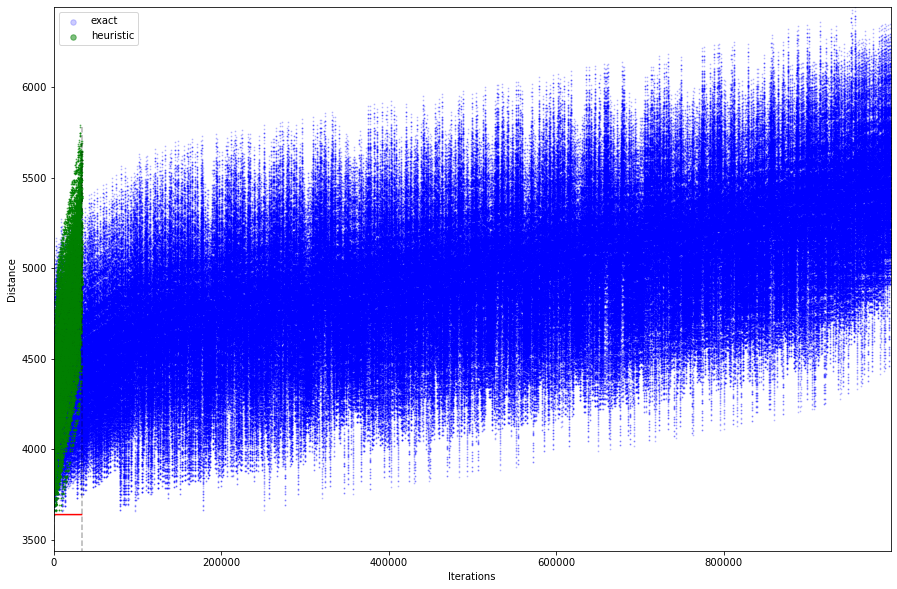

In [14]:
plot_algo(df_4)